In [19]:
# !pip install statsmodels --upgrade
#載入所需函示庫
from matplotlib import pyplot as plt
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 130
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.libqsturng
import math
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
from scipy.optimize import curve_fit
from statsmodels.tsa.api import Holt

In [20]:
# Reading dataset
# 讀取資料集
df108 = pd.read_csv('108.csv',encoding = 'utf-8')

# 簡單看一下資料集的樣子

print('Head of dataset:')
display(df108.head())

print("Tail of dataset:")
display(df108.tail())

Head of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
0,1月1日,167.64,313.631,18.9,"7,543,380","3,796,380","3,747,000","6,307,200","10,103,580"
1,1月2日,167.76,314.587,16.8,"6,572,620","6,661,620","-89,000","6,316,200","12,977,820"
2,1月3日,167.77,314.699,18.4,"7,019,088","6,662,088","357,000","6,793,200","13,455,288"
3,1月4日,167.84,315.378,6.7,"7,374,848","6,658,848","716,000","6,391,800","13,050,648"
4,1月5日,167.75,314.506,1.0,"4,338,772","6,662,772","-2,324,000","5,221,800","11,884,572"


Tail of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
360,12月27日,166.98,307.530,3.1,"855,940","1,742,940","-887,000","1,409,760","3,152,700"
361,12月28日,166.90,306.643,0.7,"700,700","1,586,700","-886,000","1,346,400","2,933,100"
362,12月29日,166.77,305.816,14.3,"832,740","1,186,740","-354,000","1,440,360","2,627,100"
363,12月30日,166.74,305.569,19.1,"1,129,728","1,306,728","-177,000","1,550,520","2,857,248"
364,12月31日,166.82,306.319,17.1,"2,393,000",0,"2,393,000","2,192,400","2,192,400"


In [21]:
for i in range(365):
  df108['水庫進流量/立方公尺'][i] = int(df108['水庫進流量/立方公尺'][i].replace(",",""))
df108['水庫進流量/立方公尺']

<ipython-input-21-9b4167d0d880>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df108['水庫進流量/立方公尺'][i] = int(df108['水庫進流量/立方公尺'][i].replace(",",""))


0      7543380
1      6572620
2      7019088
3      7374848
4      4338772
        ...   
360     855940
361     700700
362     832740
363    1129728
364    2393000
Name: 水庫進流量/立方公尺, Length: 365, dtype: object

In [22]:
df108data = []
df108data.append(df108['水庫進流量/立方公尺'].iloc[:31].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[31:59].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[59:90].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[90:120].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[120:151].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[151:181].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[181:212].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[212:243].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[243:273].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[273:304].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[304:334].mean())
df108data.append(df108['水庫進流量/立方公尺'].iloc[334:365].mean())
for i in range(12):
    df108data[i] = round(df108data[i])
    
len(df108data)

12

In [23]:
# Reading dataset
# 讀取資料集
df109 = pd.read_csv('109.csv',encoding = 'utf-8')

# 簡單看一下資料集的樣子

print('Head of dataset:')
display(df109.head())

print("Tail of dataset:")
display(df109.tail())

Head of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
0,1月1日,167.10,308.766,2.1,"2,416,420","462,420","1,954,000","2,206,080","2,668,500"
1,1月2日,167.27,310.273,0.0,"1,718,880","740,880","978,000","1,889,280","2,630,160"
2,1月3日,167.35,310.918,0.0,"1,391,012","1,302,012","89,000","1,715,400","3,017,412"
3,1月4日,167.34,310.844,0.1,"1,002,260","1,180,260","-178,000","1,586,160","2,766,420"
4,1月5日,167.31,310.625,0.2,"1,018,292","1,463,292","-445,000","1,481,040","2,944,332"


Tail of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
361,12月27日,168.44,320.737,1.1,"2,568,852","2,118,852","450,000","3,963,600","6,082,452"
362,12月28日,168.46,320.868,2.2,"1,949,832","2,129,832","-180,000","3,466,800","5,596,632"
363,12月29日,168.32,319.622,0.4,"1,730,160","3,260,160","-1,530,000","3,146,400","6,406,560"
364,12月30日,168.16,318.161,10.6,"1,869,816","3,216,816","-1,347,000","2,921,040","6,137,856"
365,12月31日,168.11,317.802,0.0,"988,000",0,"988,000","2,761,200","2,761,200"


In [24]:
for i in range(df109.shape[0]):
  df109['水庫進流量/立方公尺'][i] = int(df109['水庫進流量/立方公尺'][i].replace(",",""))
df109['水庫進流量/立方公尺']

<ipython-input-24-b2ff9aeeb197>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df109['水庫進流量/立方公尺'][i] = int(df109['水庫進流量/立方公尺'][i].replace(",",""))


0      2416420
1      1718880
2      1391012
3      1002260
4      1018292
        ...   
361    2568852
362    1949832
363    1730160
364    1869816
365     988000
Name: 水庫進流量/立方公尺, Length: 366, dtype: object

In [25]:
df109data = []
df109data.append(df109['水庫進流量/立方公尺'].iloc[:31].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[31:60].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[60:91].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[91:121].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[121:152].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[152:182].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[182:213].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[213:244].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[244:274].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[274:305].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[305:335].mean())
df109data.append(df109['水庫進流量/立方公尺'].iloc[335:366].mean())
for i in range(12):
    df109data[i] = round(df109data[i])
    
df109data

[968462,
 998404,
 1268142,
 1290393,
 3471636,
 1511104,
 1085650,
 844326,
 982157,
 3595805,
 2568258,
 6063532]

In [26]:
# Reading dataset
# 讀取資料集
df110 = pd.read_csv('110.csv',encoding = 'utf-8')

# 簡單看一下資料集的樣子

print('Head of dataset:')
display(df110.head())

print("Tail of dataset:")
display(df110.tail())

Head of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
0,1月1日,168.20,318.524,0.0,"1,109,556","1,289,556","-180,000","2,475,360","3,764,916"
1,1月2日,168.18,318.419,3.8,"974,520","614,520","360,000","2,221,200","2,835,720"
2,1月3日,168.22,318.741,0.4,"817,460","458,460","359,000","2,328,120","2,786,580"
3,1月4日,168.23,318.887,16.1,"1,168,992","1,168,992",0,"2,098,080","3,267,072"
4,1月5日,168.30,319.450,20.7,"2,306,772","2,126,772","180,000","2,324,880","4,451,652"


Tail of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
360,12月27日,168.07,317.416,13.6,"4,729,660","4,101,660","628,000","2,787,480","6,889,140"
361,12月28日,168.15,318.109,1.1,"3,473,152","2,575,152","898,000","2,765,520","5,340,672"
362,12月29日,168.22,318.749,0.4,"2,310,048","2,130,048","180,000","2,468,160","4,598,208"
363,12月30日,168.20,318.502,0.2,"1,857,808","2,396,808","-539,000","2,243,520","4,640,328"
364,12月31日,168.16,318.232,1.4,"1,244,456","615,456","629,000","2,050,560","2,666,016"


In [27]:
for i in range(df110.shape[0]):
  df110['水庫進流量/立方公尺'][i] = int(df110['水庫進流量/立方公尺'][i].replace(",",""))
df110['水庫進流量/立方公尺']

<ipython-input-27-3c752d84dd5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df110['水庫進流量/立方公尺'][i] = int(df110['水庫進流量/立方公尺'][i].replace(",",""))


0      1109556
1       974520
2       817460
3      1168992
4      2306772
        ...   
360    4729660
361    3473152
362    2310048
363    1857808
364    1244456
Name: 水庫進流量/立方公尺, Length: 365, dtype: object

In [28]:
df110data = []
df110data.append(df110['水庫進流量/立方公尺'].iloc[:31].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[31:59].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[59:90].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[90:120].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[120:151].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[151:181].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[181:212].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[212:243].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[243:273].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[273:304].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[304:334].mean())
df110data.append(df110['水庫進流量/立方公尺'].iloc[334:365].mean())
for i in range(12):
    df110data[i] = round(df110data[i])
    
df110data

[1916697,
 1488259,
 851124,
 828801,
 1036747,
 3506656,
 3585141,
 3037999,
 1716384,
 5502068,
 2087083,
 2244126]

In [29]:
totalData = df108data + df109data + df110data
print(len(totalData))
print(totalData)

36
[2683037, 881138, 1405088, 1096764, 2673796, 2917327, 1811000, 3228925, 4737023, 2757452, 1526410, 2103162, 968462, 998404, 1268142, 1290393, 3471636, 1511104, 1085650, 844326, 982157, 3595805, 2568258, 6063532, 1916697, 1488259, 851124, 828801, 1036747, 3506656, 3585141, 3037999, 1716384, 5502068, 2087083, 2244126]


In [30]:
def SI_LR(y_v, n):
    y_data = y_v
    X_data_ar = np.arange(1, len(y_v)+1)
    X_data_T = X_data_ar.T
    X_data = pd.DataFrame(X_data_T,columns = ['Time'])
    X_data = sm.add_constant(X_data)
    olsmod = sm.OLS(y_data, X_data)
    result_reg = olsmod.fit()
    st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
    y_v_LR_a = data[:, 2]
    SI_LR_a = y_v / y_v_LR_a
    SI_id_s = np.arange(1,len(y_v)+1)
    SI_id = SI_id_s - np.floor(SI_id_s / n) * n
    SI_id[np.where((SI_id[:] == 0))] = n
    SI_LR_a_df = pd.DataFrame({'SILR': SI_LR_a, 'SIid': SI_id})
    SI_LR_u = np.zeros(n)
    for j in range(1,n+1):
        SI_LR_u[j-1] = SI_LR_a_df['SILR'][SI_LR_a_df['SIid'] == j].dropna().mean()
    SI_LR = SI_LR_u / sum(SI_LR_u) * n
    print('Seasonal Index:', SI_LR)
    print('\n')
    y_v_SI_LR = np.zeros(len(y_v))
    DSI_y_v = np.zeros(len(y_v))
    for k in range(0,len(y_v)):
        Idd = int(SI_LR_a_df['SIid'][k] - 1)
        y_v_SI_LR[k] = SI_LR[Idd]
        DSI_y_v[k] = y_v[k] / SI_LR[Idd]
    print('Deseasonalized Data:', DSI_y_v)
    SI_LR_result_a = np.array([SI_LR_a_df['SIid'], y_v_SI_LR, y_v, DSI_y_v])
    SI_LR_result_df = pd.DataFrame(SI_LR_result_a.T, columns = ['SID', 'SeaIdx', 'orig', 'Des_D'])
    return {"LR_ind":SI_LR, "SI_LR_res":SI_LR_result_df}

Seasonal Index: [0.89854726 0.51836317 0.55770959 0.49975779 1.12202494 1.19268827
 0.94478049 1.06196464 1.1442525  1.6883888  0.8848681  1.48665444]


Deseasonalized Data: [2985972.04209778 1699846.84049569 2519390.0707774  2194591.09479399
 2383009.40888286 2446009.63699739 1916847.3650293  3040520.26129924
 4139840.621334   1633185.44161414 1725014.16228313 1414694.59142836
 1077808.63843253 1926070.47356743 2273839.33471483 2582036.77963947
 3094080.94417692 1266973.13894031 1149102.8944473   795060.37152976
  858339.39272145 2129725.69491086 2902419.02398237 4078642.50369337
 2133106.49654577 2871073.9509467  1526106.09057963 1658405.35790412
  923996.39150896 2940127.85321451 3794681.43517863 2860734.61393709
 1500004.58199332 3258768.36890399 2358637.41253028 1509514.20512721]
[0.89854726 0.51836317 0.55770959 0.49975779 1.12202494 1.19268827
 0.94478049 1.06196464 1.1442525  1.6883888  0.8848681  1.48665444]


,SID,SeaIdx,orig,Des_D
0,1.0,0.898547,2683037.0,2.985972e+06
1,2.0,0.518363,881138.0,1.699847e+06
2,3.0,0.557710,1405088.0,2.519390e+06
3,4.0,0.499758,1096764.0,2.194591e+06
4,5.0,1.122025,2673796.0,2.383009e+06
5,6.0,1.192688,2917327.0,2.446010e+06
6,7.0,0.944780,1811000.0,1.916847e+06
7,8.0,1.061965,3228925.0,3.040520e+06
8,9.0,1.144253,4737023.0,4.139841e+06
9,10.0,1.688389,2757452.0,1.633185e+06


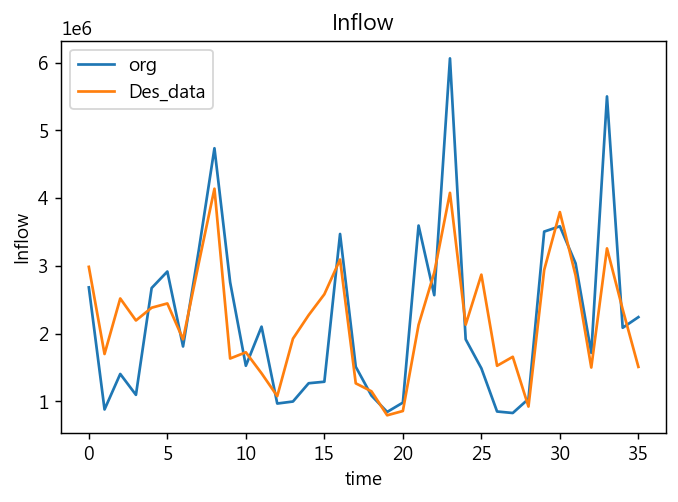

In [31]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 上面這兩句有設應該就行了
totalData_SILR = pd.DataFrame(columns=["LR_ind", "SI_LR_res"])
totalData_SILR = SI_LR(totalData, 12)
totalData_LR_Idx = totalData_SILR["LR_ind"]
print(totalData_LR_Idx)
totalData_LR_Result = totalData_SILR["SI_LR_res"]
display(totalData_LR_Result)
t_r = np.arange(0, len(totalData), 1)
plt.plot(t_r, totalData_LR_Result['orig'])
plt.plot(t_r, totalData_LR_Result['Des_D'])
plt.legend(labels=['org', 'Des_data'])
plt.xlabel('time')
plt.ylabel('Inflow')
plt.title('Inflow')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Des_D   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                 0.0001277
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.991
Time:                        20:27:08   Log-Likelihood:                -543.46
No. Observations:                  36   AIC:                             1091.
Df Residuals:                      34   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.207e+06   2.93e+05      7.544      0.0

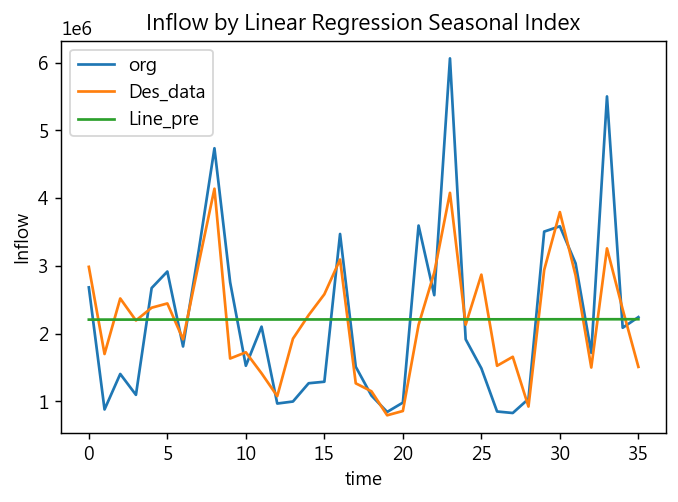

In [32]:
y_data_totalData_LR = totalData_LR_Result['Des_D']
X_data_ar_totalData = np.array(t_r)
X_data_ar_totalData_T = X_data_ar_totalData.T
X_data_totalData = pd.DataFrame(X_data_ar_totalData_T, columns = ['t'])
X_data_totalData = sm.add_constant(X_data_totalData)
olsmod_totalData_LR = sm.OLS(y_data_totalData_LR, X_data_totalData)
result_reg_totalData_LR = olsmod_totalData_LR.fit()
print(result_reg_totalData_LR.summary())
totalData_LR_st_1, totalData_LR_data_1, totalData_LR_ss2_1 = sso.summary_table(result_reg_totalData_LR, alpha=0.05)
totalData_LR_y_pre_1 = totalData_LR_data_1[:, 2]
totalData_LR_SD_1 = totalData_LR_data_1[:, 10]
des_pre_totalData_LR = totalData_LR_y_pre_1
print(des_pre_totalData_LR)
plt.plot(t_r, totalData_LR_Result['orig'])
plt.plot(t_r, totalData_LR_Result['Des_D'])
plt.plot(t_r, des_pre_totalData_LR)
plt.legend(labels=['org', 'Des_data', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Inflow')
plt.title('Inflow by Linear Regression Seasonal Index')
plt.show()

## Residual Analysis

In [33]:
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

In [34]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

[ 0.91917764 -0.5964607   0.36451197 -0.01546595  0.20297685  0.2748783
 -0.3358346   0.95562133  2.21207289 -0.65779556 -0.55186007 -0.90417835
 -1.28570279 -0.32161533  0.07275132  0.42158461  1.00082904 -1.06742159
 -1.20100333 -1.60229378 -1.53165537 -0.09189594  0.78463057  2.12198411
 -0.08897134  0.75212119 -0.78330882 -0.63386054 -1.47930437  0.83872674
  1.82905636  0.75206399 -0.8298504   1.22332707  0.1712075  -0.83059718]


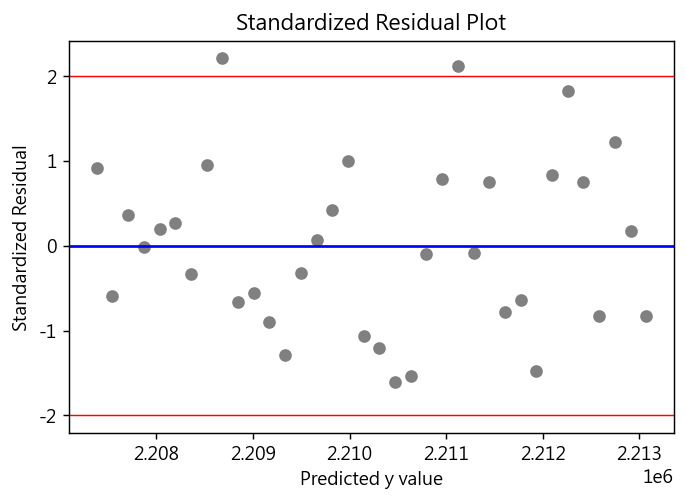

Shapiro Test
Statistics=0.966, p=0.334
runs =  16
n1 =  18
n2 =  18
runs_exp =  19.0
stan_dev =  2.9568322818274866
z =  -1.014599312391785
pval_z =  0.3102968672638191
p_value for Z-statistic=  0.3102968672638191


The Durbin Watson test
x_square_sum =  35.783926362059596
size =  36
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.         -1.51563834  0.96097267 -0.37997792  0.2184428   0.07190145
 -0.61071289  1.29145593  1.25645156 -2.86986844  0.10593549 -0.35231829
 -0.38152444  0.96408747  0.39436665  0.34883329  0.57924443 -2.06825063
 -0.13358174 -0.40129046  0.07063841  1.43975943  0.87652652  1.33735354
 -2.21095545  0.84109253 -1.53543001  0.14944828 -0.84544383  2.31803111
  0.99032962 -1.07699237 -1.58191439  2.05317747 -1.05211957 -1.00180468]
d =  1.4313915532378143
d value = 1.4313915532378143


In [35]:
totalData_st, totalData_data, totalData_ss2 = sso.summary_table(result_reg_totalData_LR, alpha=0.05)
totalData_y_pre = totalData_data[:, 2]
totalData_SD = totalData_data[:, 10]
print(totalData_SD)
plt.plot(totalData_y_pre, totalData_SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()
print('Shapiro Test')
stat, p = stats.shapiro(totalData_SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))
totalData_SD_median = statistics.median(totalData_SD)
#print('median = ', SD_median)
Z_pval = runsTest(totalData_SD, totalData_SD_median) 
print('p_value for Z-statistic= ', Z_pval)
print('\n')
print('The Durbin Watson test')
d_w = Durbin_Watson_test(totalData_SD)
print('d value =', d_w)

n = 36, k = 1, alpha = 0.05

dL=1.411, dU=1.525
Because dL = 1.411 < d value 1.4313915532378143 < dU=1.525 , it is inconclusive whether the first order correlation exists.

## Forecasting

New Des Prediction [2213232.71460098 2213395.17742302 2213557.64024505 2213720.10306709
 2213882.56588912 2214045.02871116 2214207.49153319 2214369.95435523
 2214532.41717726 2214694.8799993  2214857.34282133 2215019.80564337]
New Seasonal Prediction [1988694.19377184 1147342.54485859 1234522.32097466 1106323.87093878
 2484031.46335838 2640665.53286508 2091940.04714368 2351582.58797828
 2533984.26508361 3739266.02003513 1959856.60325322 3292969.035651  ]


,time,org,Des_data,Line_pre,Seasonal Pre
0,0.0,2683037.0,2.985972e+06,2.207384e+06,1.983439e+06
1,1.0,881138.0,1.699847e+06,2.207547e+06,1.144311e+06
2,2.0,1405088.0,2.519390e+06,2.207709e+06,1.231260e+06
3,3.0,1096764.0,2.194591e+06,2.207871e+06,1.103401e+06
4,4.0,2673796.0,2.383009e+06,2.208034e+06,2.477469e+06
5,5.0,2917327.0,2.446010e+06,2.208196e+06,2.633690e+06
6,6.0,1811000.0,1.916847e+06,2.208359e+06,2.086414e+06
7,7.0,3228925.0,3.040520e+06,2.208521e+06,2.345372e+06
8,8.0,4737023.0,4.139841e+06,2.208684e+06,2.527292e+06
9,9.0,2757452.0,1.633185e+06,2.208846e+06,3.729391e+06


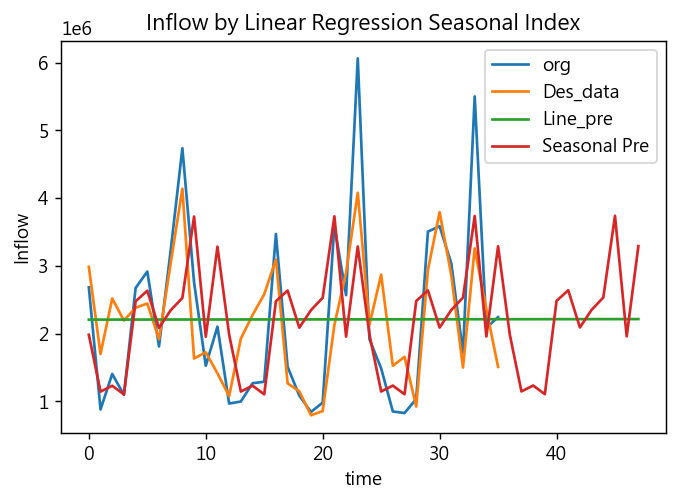

In [36]:
Sea_pre_totalData_LR = des_pre_totalData_LR * totalData_LR_Result['SeaIdx']
New_t_1 = np.array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])
Total_t_1 = np.append(t_r, New_t_1)
New_t_1 = sm.add_constant(New_t_1)
totalData_LR_des_pre_New_t_1 = result_reg_totalData_LR.predict(New_t_1)
print('New Des Prediction', totalData_LR_des_pre_New_t_1)
totalData_LR_Sea_pre_New_t_1 = totalData_LR_des_pre_New_t_1 * totalData_LR_Idx
print('New Seasonal Prediction', totalData_LR_Sea_pre_New_t_1)
New_Nan = np.zeros(New_t_1.shape[0])
New_Nan[:] = np.nan
totalData_LR_New_orig_1 = np.append(totalData_LR_Result['orig'], New_Nan)
totalData_LR_New_Des_D_1 = np.append(totalData_LR_Result['Des_D'], New_Nan)
totalData_LR_New_des_pre_1 = np.append(des_pre_totalData_LR, totalData_LR_des_pre_New_t_1)
totalData_LR_New_Sea_pre_1 = np.append(Sea_pre_totalData_LR, totalData_LR_Sea_pre_New_t_1)
totalData_LR_S_a = np.array([Total_t_1, totalData_LR_New_orig_1, totalData_LR_New_Des_D_1, totalData_LR_New_des_pre_1, totalData_LR_New_Sea_pre_1])
totalData_LR_S_df = pd.DataFrame(totalData_LR_S_a.T, columns=['time', 'org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
display(totalData_LR_S_df)
plt.plot(Total_t_1, totalData_LR_New_orig_1)
plt.plot(Total_t_1, totalData_LR_New_Des_D_1)
plt.plot(Total_t_1, totalData_LR_New_des_pre_1)
plt.plot(Total_t_1, totalData_LR_New_Sea_pre_1)
plt.legend(labels=['org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
plt.xlabel('time')
plt.ylabel('Inflow')
plt.title('Inflow by Linear Regression Seasonal Index')
plt.show()